**Learning a Racetrack using SARSA**


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

**Creating the Environment**

In [ ]:
class ObstacleCourse(object):
    
    def load(self, course):
        y_size, x_size = len(course), len(course[0])
        self.course = np.zeros((x_size, y_size), dtype=np.int16)
        for y in range(y_size):
            for x in range(x_size):
                point = course[y][x]
                if point == 'o':
                    self.course[x, y] = 1
                elif point == 'F':
                    self.course[x, y] = 0
                elif point == 'S':
                    self.course[x, y] = 2
                elif point == 'X':
                    self.course[x, y] = -1     
        self.course = self.course
        for x in range(x_size):
            for y in range(y_size):
                if self.course[x, y] == 0:
                    self.start_positions.append((x, y))

    def obstacle(self, pos):
        return self.course[pos[0], pos[1]] == -1
    
    def finished(self, pos):
        return self.course[pos[0], pos[1]] == 2
    
    def terminal_state(self):
        return (self.course[self.position[0], self.position[1]] == 2)
        
    def obstacle_state(self):
        return (self.course[self.position[0], self.position[1]] == -1)

    def __init__(self, course):
        self.NOISE = 0.0
        self.EPS = 0.1
        self.MAX_VELOCITY = 4
        self.start_positions = []
        self.course = None
        self.load(course)
        self.random_start()
        self.velocity = np.array([0, 0], dtype=np.int16)


    def reward(self, action):
        if self.terminal_state(): 
          return 0.0
        self.update_velocity(action)
        self.update_position()
        if self.terminal_state():
            return 100.0
        if self.obstacle_state():
            return -100.0
        return -1.0
    

    def get_state(self):
        return self.position.copy(), self.velocity.copy()    

    def update_velocity(self, action):
        if np.random.rand() > self.NOISE:
            self.velocity += np.array(action, dtype=np.int16)
            self.velocity = np.minimum(self.velocity, self.MAX_VELOCITY)
            self.velocity = np.maximum(self.velocity, np.maximum(-self.MAX_VELOCITY,-self.position[1]))
            
    def reset(self):
        self.random_start()
        self.velocity = np.array([0, 0], dtype=np.int16)

    def update_position(self):
        for i in range(0, self.MAX_VELOCITY+1):
            step = i / self.MAX_VELOCITY
            pos = self.position + np.round(self.velocity * step).astype(np.int16)
            if self.obstacle(pos):
                self.position = pos
                return
            if self.finished(pos):
                self.position = pos
                self.velocity = np.array([0, 0], dtype=np.int16)
                return
        self.position = pos
    

    def random_start(self):
        self.position = np.array(random.choice(self.start_positions), dtype=np.int16)
        print(self.position)
        
    def action_to_tuple(self, a):
        ax = a // 3 - 1
        ay = a % 3 - 1
        return ax, ay
    
    
    def tuple_to_action(self, a):
        return int((a[0] + 1) * 3 + a[1] + 1)
    
    
    def greedy_eps(self, Q):
        s = self.get_state()
        s_x, s_y = s[0][0], s[0][1]
        s_vx, s_vy = s[1][0], s[1][1]
        if np.random.rand() > self.EPS:
            if (np.max(Q[s_x, s_y, s_vx, s_vy, :, :]) ==
                np.min(Q[s_x, s_y, s_vx, s_vy, :, :])):
                a = (0, 0)
            else:
                a = np.argmax(Q[s_x, s_y, s_vx, s_vy, :, :])
                a = np.unravel_index(a, (3, 3)) - np.array([1, 1])
                a = (a[0], a[1])
        else:
            a = self.action_to_tuple(random.randrange(9))        
        return a
    
    
    def state_action(self, s, a):
        s_x, s_y = s[0][0], s[0][1]
        s_vx, s_vy = s[1][0], s[1][1]
        a_x, a_y = a[0]+1, a[1]+1
        s_a = (s_x, s_y, s_vx, s_vy, a_x, a_y)        
        return s_a        

**Following respresntation is used to follow the race track:**   

1.    'S'  represents the start line.
2.    'F'  represents the finish line.
3.    'o'  represents the open cell.
4.    'X'  represents the obstacle.



In [ ]:
course_1 = ['XFFFFFFFFFFFFFFFX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XooooXXXXXXXooooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XXXXXXoooooXXXXXX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XooooXXXXXXXooooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XSSSSSSSSSSSSSSSX']

course_2 =   ['XFFFFFFFFFFFFFFFX',
              'XoooooooooooooooX',
              'XoooooooooooooooX',
              'XoooooooooooooooX',
              'XXXXXXXXXXXXooooX',
              'XooooooooooXooooX',
              'XooooooooooXooooX',
              'XooooooooooXooooX',
              'XooooooooooXooooX',
              'XooooXooooooooooX',
              'XooooXooooooooooX',
              'XooooXooooooooooX',
              'XooooXooooooooooX',
              'XooooXXXXXXXXXXXX',
              'XoooooooooooooooX',
              'XoooooooooooooooX',
              'XoooooooooooooooX',
              'XSSSSSSSSSSSSSSSX']

course_3 = ['XFFFFFFFFFFFFFFFX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XooooXXXXXXXooooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XooXoooooooooXooX',
            'XooXoooooooooXooX',
            'XooXoooooooooXooX',
            'XooXoooooooooXooX',
            'XooXoooooooooXooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XoooooooooooooooX',
            'XSSSSSSSSSSSSSSSX']


**SARSA algorithm** is a slight variation of the popular Q-Learning algorithm. For a learning agent in any Reinforcement Learning algorithm it’s policy can be of two types:-


1.   **On Policy:**In this, the learning agent learns the value function according to the current action derived from the policy currently being used.
2.   **Off Policy:** In this, the learning agent learns the value function according to the action derived from another policy.


**Q-Learning technique is an Off Policy** technique and uses the greedy approach to learn the Q-value. **SARSA technique, on the other hand, is an On Policy** and uses the action performed by the current policy to learn the Q-value.

This name simply reflects the fact that the main function for updating the Q-value depends on the current state of the agent "S1", the action the agent chooses "A1", the reward "R" the agent gets for choosing this action, the state "S2" that the agent enters after taking that action, and finally the next action "A2" the agent chooses in its new state.

For solving the Obstacle race, we have used the **SARSA Algorithm.**

In [ ]:
course = course_2
x_size, y_size = len(course[0]),len(course)
Q = np.zeros((x_size, y_size, 9, 9, 3, 3), dtype=np.float64)
position_map = np.zeros((x_size, y_size), dtype=np.float64)  
N = 40000  
gamma = 1.0
alpha = 0.25
track = ObstacleCourse(course)

# Sarsa

epochs = []
counts = []
count = 0
for e in range(N):
    if (e+1) % 200 == 0: print('Episode {}'.format(e+1))
    track.reset()
    s = track.get_state()
    a = track.greedy_eps(Q)
    while not track.terminal_state() and not track.obstacle_state():
        position_map[s[0][0], s[0][1]] += 1
        print(position_map)
        count += 1
        r = track.reward(a)
        s_prime = track.get_state()
        a_prime = track.greedy_eps(Q)
        s_a = track.state_action(s, a)
        s_a_prime = track.state_action(s_prime, a_prime)
        Q[s_a] = Q[s_a] + alpha * (r + gamma * Q[s_a_prime] - Q[s_a])
        s, a = s_prime, a_prime
    epochs.append(e)
    counts.append(count)

We experimented the reward values for the obstacle and finish positions. Using reward value of -10 and 10 respectively as stated in the questions caused the learning to be wayward. Certain start postion caused the obstacle collision to be more rewarding than trying to reach to finish line. In the end we decided to use the higher reward value of -100 and 100 for obstacles and terminal position respectively to learn the obstacle course as desirable.

In [ ]:
pi = np.zeros((x_size, y_size, 9, 9), dtype=np.int16)
for idx in np.ndindex(x_size, y_size, 9, 9):
    a = np.argmax(Q[idx[0], idx[1], idx[2], idx[3], :, :])
    a = np.unravel_index(a, (3, 3))
    pi[idx] = track.tuple_to_action(a - np.array([1, 1]))    

In [ ]:
from celluloid import Camera

<b>LEARNING COURSE 2</b>


Learning this obstacle course was a little tricky.This required learning for 40000 iteration and alpha value 0.2

**Heatmap showing steps exploration during the learning for Course 2.**

Exploration Heatmap


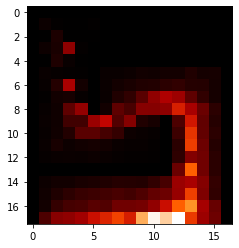

In [ ]:
print('Exploration Heatmap')
plt.imshow(np.flipud(position_map.T), cmap='gist_heat', interpolation='nearest')
plt.show()

[14  0]


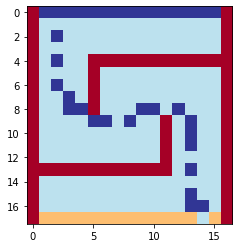

In [ ]:
fig = plt.figure()
camera = Camera(fig)
pos_map = np.zeros((x_size, y_size))
track.reset()
for e in range(1000):
    s = track.get_state()
    s_x, s_y = s[0][0], s[0][1]
    s_vx, s_vy = s[1][0], s[1][1]
    pos_map[s_x, s_y] += 1  # exploration map
    act = track.action_to_tuple(pi[s_x, s_y, s_vx, s_vy])
    track.reward(act)
    pos_map = (pos_map > 0).astype(np.float32)
    pos_map +=  track.course  # overlay track course
    plt.imshow(np.flipud(pos_map.T), cmap='RdYlBu', interpolation='nearest')
    #plt.show()
    camera.snap()
    pos_map -=  track.course
    if track.terminal_state(): 
      break

In [ ]:
animation = camera.animate()
animation.save('Trac.mp4')

**Simulation for Course 2.** 

```
# This is formatted as code
```



In [ ]:
from IPython.display import HTML,Image
from base64 import b64encode
mp4 = open('Trac.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

<b>Learning course 1</b>

Learning this obstacle required learning for 20000 episode and alpha value 0.1

**Heatmap showing steps exploration during the learning for Course 1.**

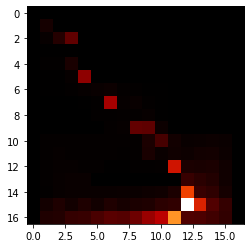

In [ ]:
Image(filename='Track1_heatmap.png')

**Simulation for Course 1.** 

In [ ]:
mp4_2 = open('Track1_simulation.mp4','rb').read()
data_url_2 = "data:video/mp4;base64," + b64encode(mp4_2).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url_2)

<b>Learning course 3</b>

Learning this obstacle was straight forward and again required learning for 20000 episode and alpha value 0.1

**Heatmap showing steps exploration during the learning for Course 3.** 

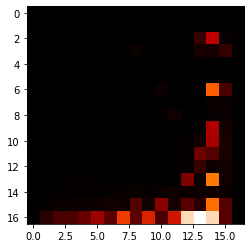

In [ ]:
Image(filename='another_track.png')

**Simulation for Course 3.** 

In [ ]:
mp4_3 = open('another_track.mp4','rb').read()
data_url_3 = "data:video/mp4;base64," + b64encode(mp4_3).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url_3)